# Root mean square propagation (RMSprop)

In [1]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
# ETAPE 1

# définition des parametres : pour tester les fonctions, on prendra n2 = 5

# n = nombre de données d'apprentissage 
# n2 = nombres de neurones dans la 2eme couche
# eta = pas dans la méthode du gradient à pas fixe (= learning rate)
# Niter = nombre d'itérations dans la méthode du gradient à pas fixe

n = 120
n1 = n//2
n2 = 15
eta = 0.3 #learning rate

Nepoch = 2500
Nbatch = 12
Batchsize = 10

epsi = 10**(-8)

In [3]:
# ETAPE 2

# génération des données d'apprentissage

U = (np.random.rand(n)).reshape(1,n)
X = np.zeros(n).reshape(1,n)
X[0][:n1] = np.sin(2*np.pi*U[0][:60])
X[0][n1:] = np.exp(U[0][60:])-1

y = np.zeros(n).reshape(1,n)
y[0][:n1] = 1
y[0][n1:] = 0

In [4]:
# ETAPE 3

# Fonction d'activation
def sigma(z):
    return 1/(1+np.exp(-z))

# Dérivée de la fonction d'activation
def sigmaprime(z):
    return np.exp(-z)/((1+np.exp(-z))**2)

def relu(z):
    return z * (z > 0)

def reluprime(z):
    return 1. * (z > 0)

def softmax(z):
    
    u = 1.0/np.sum(np.exp(z), axis=0)
    
    return u*np.exp(z)

In [5]:
# ETAPE 4

# Initialisation matrices poids et vecteurs biais du réseau de neurones

W2 = np.random.randn(n2,1)
b2 = np.random.randn(n2,1)

W3 = np.random.randn(1,n2)
b3 = np.random.randn(1,1)

In [6]:
# ETAPE 5

# Calcul de dC/dW2, dC/dW3, dC/db2 et dC/db3 en utilisant
# la méthode de backpropagation

def compute_grad(x,y,W2,W3,b2,b3):
    a1 = x
    # Calculer et stocker
    z2 = np.dot(W2,a1) + b2
    a2 = sigma(z2)

    z3 = np.dot(W3,a2) + b3
    a3 = sigma(z3)

    # Calcul
    delta3 = (a3-y)/(a3*(1-a3))*sigmaprime(z3)
    # Calcul
    delta2 = np.dot(W3.T,delta3)*sigmaprime(z2)
    
    dCdW2 = np.dot(delta2,a1.T)
    dCdW3 = np.dot(delta3,a2.T)
    dCdb2 = delta2
    dCdb3 = delta3

    return dCdW2, dCdW3, dCdb2, dCdb3

In [7]:
# ETAPE 6

# Définition de la fonction coût
def cost(y,y_pred):
    return (-1*n)*np.sum(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))

In [8]:
# ETAPE 7

# Prediction du modèle

def model_predict(X,W2,W3,b2,b3):
    a1 = X
    # Calculer et stocker
    z2 = W2@a1 + b2
    a2 = sigma(z2)

    z3 = W3@a2 + b3
    a3 = sigma(z3)
     
    return a3

In [9]:
Cost = np.zeros(Nepoch)
Acc = np.zeros(Nepoch)
beta = 0.9


dCdW2_avg = np.zeros(W2.shape)
dCdW3_avg = np.zeros(W3.shape)
dCdb2_avg = np.zeros(b2.shape)
dCdb3_avg = np.zeros(b3.shape)

HkW2=np.zeros(W2.shape)
HkW3=np.zeros(W3.shape)
Hkb2=np.zeros(b2.shape)
Hkb3=np.zeros(b3.shape)

for k in range(Nepoch):
    
    # Votre code ici
    
    # Mélanger des données
    (X,y) = shuffle(X.T,y.T)
    X = X.T
    y = y.T
    y_pred = model_predict(X,W2,W3,b2,b3)
    Cost[k] = cost(y,y_pred)
    Acc[k] = 1-0.5*np.sum(np.abs(np.round(y_pred)-y))/n
    for j in range(Nbatch):
        dCdW2 = np.zeros(W2.shape)
        dCdW3 = np.zeros(W3.shape)
        dCdb2 = np.zeros(b2.shape)
        dCdb3 = np.zeros(b3.shape)
        for i in range(Batchsize):
            u = j*Batchsize

            xi = X[0][u+i]
            yi = y[0][u+i]
            
            gW2, gW3, gb2, gb3 = compute_grad(xi,yi,W2,W3,b2,b3)
            
            dCdW2 += gW2
            dCdW3 += gW3
            dCdb2 += gb2
            dCdb3 += gb3
            
        dCdW2_avg = beta*dCdW2_avg + (1-beta)*dCdW2*dCdW2
        dCdW3_avg = beta*dCdW3_avg + (1-beta)*dCdW3*dCdW3
        dCdb2_avg = beta*dCdb2_avg + (1-beta)*dCdb2*dCdb2
        dCdb3_avg = beta*dCdb3_avg + (1-beta)*dCdb3*dCdb3
            
        HkW2=1/(np.sqrt(dCdW2_avg+epsi))
        HkW3=1/(np.sqrt(dCdW3_avg+epsi))
        Hkb2=1/(np.sqrt(dCdb2_avg+epsi))
        Hkb3=1/(np.sqrt(dCdb3_avg+epsi))
        
        # Actualisation des paramètres    
        W2 = W2 - (eta/Batchsize)*HkW2*dCdW2
        W3 = W3 - (eta/Batchsize)*HkW3*dCdW3
        b2 = b2 - (eta/Batchsize)*Hkb2*dCdb2
        b3 = b3 - (eta/Batchsize)*Hkb3*dCdb3


In [10]:
y_pred = model_predict(X,W2,W3,b2,b3)
y_pred

array([[3.05296965e-01, 2.90982803e-01, 9.99999968e-01, 5.51960388e-05,
        5.93145582e-04, 3.53599320e-01, 2.85034492e-01, 1.31572194e-02,
        3.24795232e-01, 4.91275625e-01, 5.41617749e-01, 2.89824616e-01,
        5.44051893e-01, 3.71752023e-01, 9.99999974e-01, 2.85497267e-01,
        6.60380963e-05, 2.82506323e-01, 3.21851141e-01, 3.00047466e-01,
        2.99213014e-01, 9.99999976e-01, 9.99999973e-01, 3.00721502e-01,
        1.04126760e-05, 3.31065437e-01, 1.49916622e-01, 3.58399698e-01,
        3.56192645e-01, 3.71489886e-01, 4.61479342e-02, 1.90858307e-02,
        4.85015104e-01, 9.99999872e-01, 9.99999968e-01, 6.91569076e-04,
        5.17685535e-01, 3.01670705e-01, 9.99999947e-01, 6.02822375e-06,
        4.62134595e-06, 2.87368555e-01, 4.52982453e-01, 1.95329697e-01,
        3.38969286e-01, 9.99999979e-01, 3.66600273e-01, 5.17405985e-01,
        5.57065883e-01, 5.32446282e-01, 3.06004501e-01, 2.50156232e-01,
        2.87245084e-01, 9.99999978e-01, 8.39838332e-06, 7.819078

In [11]:
def classification(y_true,y_pred):
    return 1-0.5*np.sum(np.abs(np.round(y_pred)-y))/n


In [12]:
# génération des données d'apprentissage

U = (np.random.rand(n)).reshape(1,n)
X = np.zeros(n).reshape(1,n)
X[0][:n1] = np.sin(2*np.pi*U[0][:60])
X[0][n1:] = np.exp(U[0][60:])-1

y = np.zeros(n).reshape(1,n)
y[0][:n1] = 1
y[0][n1:] = 0

In [13]:
print('Niveau de précision : ',classification(y,y_pred)*100)

Niveau de précision :  72.08333333333333


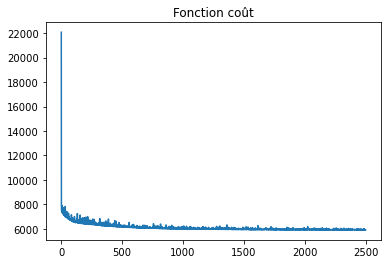

In [14]:
plt.figure()
plt.plot(Cost)
plt.title('Fonction coût')
plt.show()

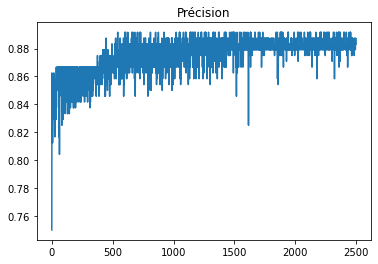

In [15]:
plt.figure()
plt.plot(Acc)
plt.title('Précision')
plt.show()